# Objective: To understand the importance of scaling on PCA

In [2]:
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

## Task 0: Write the function to compute the PCA using Eigenvector approach

In [3]:
# Solution
from numpy.linalg import svd 

def PCA(X):
    U, S, P_T = svd(X, full_matrices=False)
    Sigma = np.diag(S)
    T = np.dot(U, Sigma)
    return T, P_T.T, Sigma # Score, Loadings, Variance

In [4]:
# Tip: Use this function to minimize code redundancy
def plot_scores(T):
    """Plot the scores 'T'."""
    plt.figure(figsize=(12, 9))
    plt.scatter(
        T[:, 0], T[:, 1],
        c=y, edgecolor='green', alpha=0.9,
        cmap=plt.cm.get_cmap('Spectral', 3)
    )
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()
    plt.show()
    

# Load dataset. Note that the target values y will not be used this time
X, y = load_wine(return_X_y=True)

### Three different ways of scaling  
Even though there are numerous methods of scaling, in this exercise we mention three frequently used ways of scaling, and trust that you will get an intuition for which scaling is appropriate when you examine new data sets.
* Scaling by removing the mean and dividing by the standard deviation:
```
standard_scaling = preprocessing.StandardScaler()
X_standard = standard_scaling.fit_transform(X)
```  
* Scaling to min and maximum values of each feature:
```
minmax_scaling = preprocessing.MinMaxScaler()
X_minmax = minmax_scaling.fit_transform(X)
```  
* Scaling by diving by the maximum absolute values of each features:
```
max_abs_scaler = preprocessing.MaxAbsScaler()
X_maxabs = max_abs_scaler.fit_transform(X)
```

## Creating the scores plot without scaling

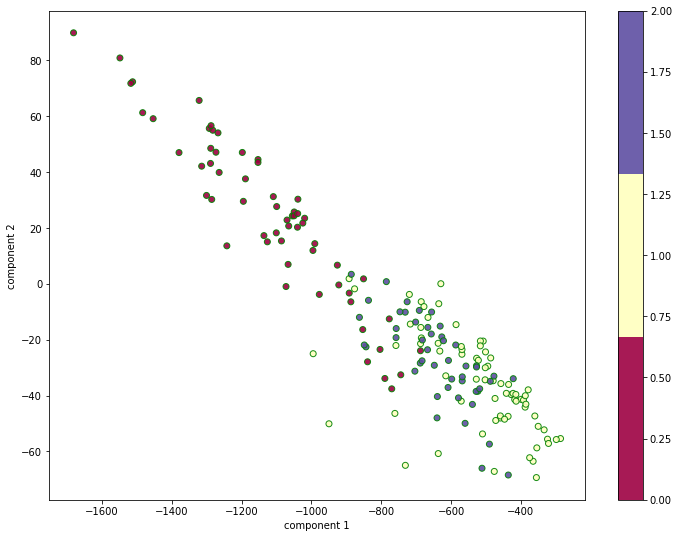

In [5]:
T, _, _ = PCA(X)
plot_scores(T)

## Task 1.1: Create the scores plot with sklearn standard scaling

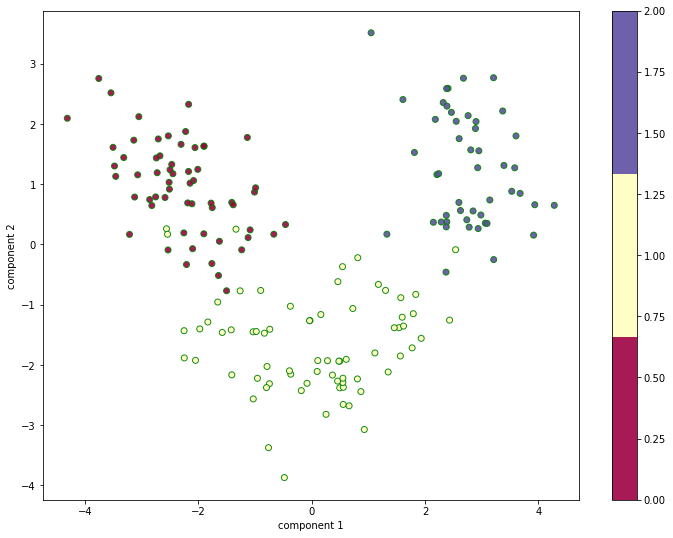

In [6]:
standard_scaling = preprocessing.StandardScaler()
X_standard = standard_scaling.fit_transform(X)

T, _, _ = PCA(X_standard)
plot_scores(T)

## Task 1.2: Create the scores plot with standard scaling, but implement the standard scaler yourself    
Here you can use numpy or pandas, but avoid using a pre-implemented standard-scaler as we find in e.g. sklearn.  
*Hint*: A one-line solution can be found.

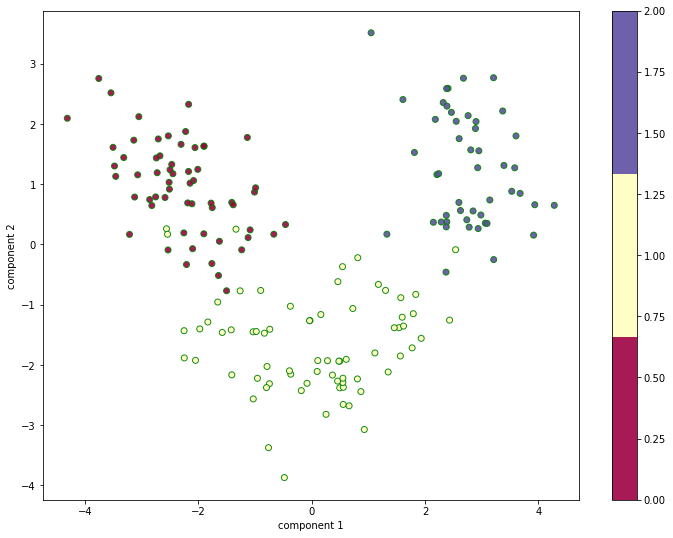

In [11]:
# Scaling by removing the mean and dividing by the standard deviation of X
# Each column is a feature, 13 features total
# One-line equivalent: X_std = np.array([(X[:, col] - np.mean(X[:, col])) / np.std(X[:, col]) for col in range(X.shape[1])])

X_standard_m = np.zeros_like(X)
for col in range(X_standard_m.shape[1]):
    X_col = X[:, col]
    X_standard_m[:, col] = (X_col - np.mean(X_col)) / np.std(X_col)

T, _, _ = PCA(X_standard_m)

plot_scores(T)

## Task 2: Create the scores plot with min max scaling

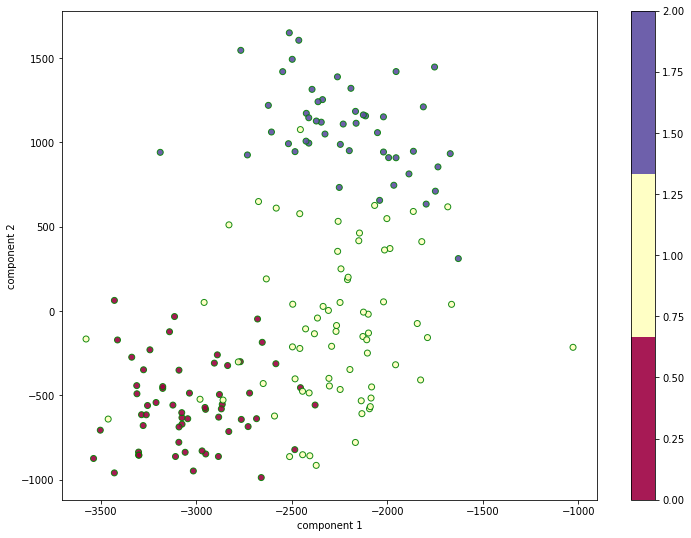

In [33]:
X_std = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
X_scale = (np.max(X) - np.min(X)) + np.min(X)
X_minmax_m = X_scale * X_std

T, _, _ = PCA(X_minmax_m)
plot_scores(T)


## Task 3: Create the scores plot with max abs scaling

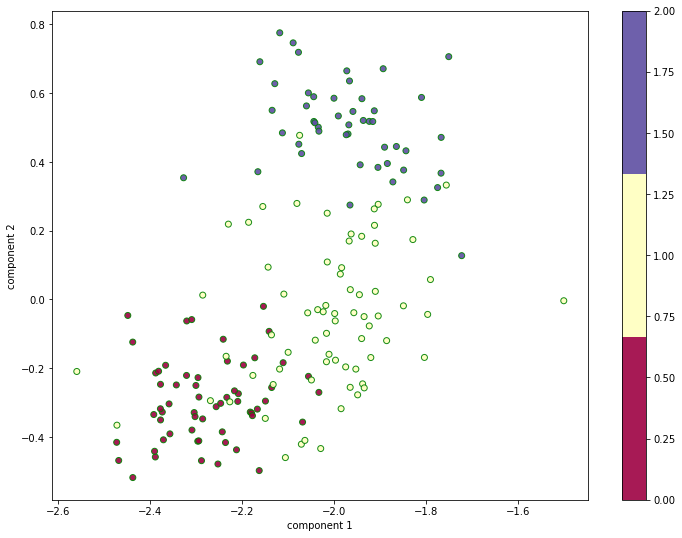

In [14]:
X_maxabs_m = np.zeros_like(X)
for col in range(X_maxabs_m.shape[1]):
    X_col = X[:, col]
    X_maxabs_m[:, col] = X_col / np.max(np.abs(X_col))

T, _, _ = PCA(X_maxabs_m)

plot_scores(T)


## Task 5: Comment on the structure/scale of data that each of the normalization techniques can be helpful on